In [1]:
!pip install pycaret

In [2]:
import pandas as pd
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


## Getting the data

In [0]:
train_set = pd.read_csv('/content/gdrive/My Drive/Kaggel Projects/house-prices-advanced-regression-techniques/With PayCart library/train.csv')
test_set = pd.read_csv('/content/gdrive/My Drive/Kaggel Projects/house-prices-advanced-regression-techniques/With PayCart library/test.csv')

In [4]:
train_set.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
#check the shape of data
train_set.shape

(1460, 81)

##  Setting up Environment in PyCaret

In [0]:
#setting the environment id pycaret

from pycaret.regression import *

In [7]:
exp_reg102 = setup(data=train_set,target= 'SalePrice',session_id=123,
                  normalize = True, transformation = True, transform_target = True, 
                  combine_rare_levels = True, rare_level_threshold = 0.05,
                  remove_multicollinearity = True, multicollinearity_threshold = 0.95, 
                   handle_unknown_categorical=True )

 
Setup Succesfully Completed!


,Description,Value
0,session_id,123
1,Transform Target,True
2,Transform Target Method,box-cox
3,Original Data,"(1460, 81)"
4,Missing Values,True
5,Numeric Features,21
6,Categorical Features,58
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


## Create a Model with bayesian ridge regression and Random Forest regression

In [8]:
# create a model - Bayesian Ridge
br= create_model('br')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,19648.0133,2.311272e+09,48075.6913,0.7177,0.1811,0.1131
1,15678.9097,6.384932e+08,25268.4227,0.9004,0.1218,0.0860
2,14991.4103,5.345268e+08,23119.8351,0.8843,0.1336,0.0933
3,14722.8798,5.522544e+08,23500.0942,0.8935,0.1154,0.0834
4,18669.8408,1.381201e+09,37164.5139,0.8595,0.1624,0.1103
5,16818.6764,8.841331e+08,29734.3750,0.8775,0.1331,0.0974
6,14956.3089,4.655146e+08,21575.7863,0.9013,0.1040,0.0819
7,17118.1975,7.407107e+08,27215.9999,0.8913,0.1373,0.0948
8,22138.8721,8.022809e+09,89570.1355,-0.1974,0.2189,0.1353
9,13944.4693,4.278151e+08,20683.6907,0.9225,0.1145,0.0808


In [9]:
# create a model - random forest regression

rf =create_model('rf')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,22744.2252,2.198340e+09,46886.4638,0.7315,0.1949,0.1300
1,19377.9369,1.087436e+09,32976.2919,0.8303,0.1416,0.0997
2,14661.5006,4.122646e+08,20304.2996,0.9107,0.1323,0.0983
3,18279.8768,8.440177e+08,29051.9824,0.8373,0.1509,0.1076
4,22693.8554,2.254108e+09,47477.4509,0.7707,0.1959,0.1352
5,18494.6776,1.340846e+09,36617.5586,0.8142,0.1531,0.1047
6,17306.8573,6.887488e+08,26244.0240,0.8539,0.1306,0.0951
7,20293.1404,1.085959e+09,32953.8934,0.8407,0.1580,0.1134
8,20835.6218,1.122575e+09,33504.8469,0.8325,0.1645,0.1182
9,17886.7952,8.842951e+08,29737.1004,0.8398,0.1268,0.0895


## Tune a Models

In [18]:
# Tune the random forest model
tuned_rf = tune_model('rf')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,22958.8728,2.328052e+09,48249.8900,0.7156,0.1976,0.1310
1,19742.6910,1.026557e+09,32039.9351,0.8398,0.1430,0.1026
2,15036.9485,4.386276e+08,20943.4372,0.9050,0.1335,0.1002
3,18468.5491,8.467024e+08,29098.1508,0.8368,0.1505,0.1086
4,22804.6216,2.174439e+09,46630.8854,0.7788,0.1954,0.1361
5,18674.8460,1.278684e+09,35758.6947,0.8228,0.1490,0.1043
6,17390.0682,6.893844e+08,26256.1310,0.8538,0.1308,0.0959
7,20320.7559,1.029793e+09,32090.3917,0.8489,0.1590,0.1154
8,21748.6608,1.246713e+09,35308.8275,0.8139,0.1719,0.1245
9,17930.3146,9.091491e+08,30152.0992,0.8353,0.1281,0.0895


In [10]:
# Tune the bayesian ridge regression
tuned_bagged_br = tune_model('br', ensemble=True, method='Bagging')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,19209.3360,2.658925e+09,51564.7609,0.6752,0.1838,0.1118
1,15606.8315,6.043548e+08,24583.6282,0.9057,0.1202,0.0863
2,13608.0698,4.360262e+08,20881.2414,0.9056,0.1229,0.0853
3,13907.6179,5.277255e+08,22972.2770,0.8983,0.1134,0.0791
4,17808.6763,1.295121e+09,35987.7953,0.8683,0.1597,0.1069
5,15712.0191,7.269560e+08,26962.1221,0.8993,0.1284,0.0920
6,14228.9354,4.114960e+08,20285.3648,0.9127,0.1004,0.0784
7,15494.3651,6.163091e+08,24825.5729,0.9096,0.1272,0.0871
8,22212.5635,7.836477e+09,88523.8789,-0.1696,0.2147,0.1334
9,14380.4928,4.794299e+08,21895.8867,0.9131,0.1132,0.0813


In [11]:
plot_model(tuned_bagged_br, plot='parameter')

,Parameters
base_estimator__alpha_1,0.2
base_estimator__alpha_2,0.05
base_estimator__alpha_init,None
base_estimator__compute_score,True
base_estimator__copy_X,True
base_estimator__fit_intercept,True
base_estimator__lambda_1,0.005
base_estimator__lambda_2,1e-07
base_estimator__lambda_init,None
base_estimator__n_iter,300


In [12]:
print(tuned_bagged_br)

BaggingRegressor(base_estimator=BayesianRidge(alpha_1=0.2, alpha_2=0.05,
                                              alpha_init=None,
                                              compute_score=True, copy_X=True,
                                              fit_intercept=True,
                                              lambda_1=0.005, lambda_2=1e-07,
                                              lambda_init=None, n_iter=300,
                                              normalize=False, tol=0.001,
                                              verbose=False),
                 bootstrap=True, bootstrap_features=True, max_features=1.0,
                 max_samples=1.0, n_estimators=50, n_jobs=None, oob_score=False,
                 random_state=123, verbose=0, warm_start=False)


## Plot a Model

Residual Plot

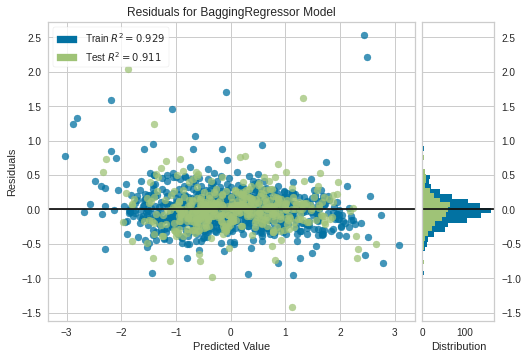

In [19]:
plot_model (tuned_bagged_br)

##Prediction Error Plo

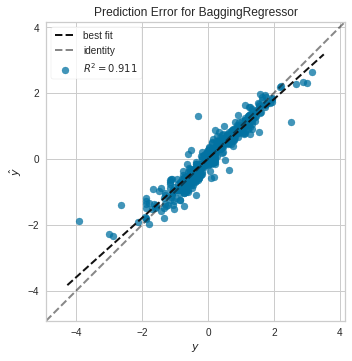

In [20]:
plot_model (tuned_bagged_br, plot = 'error')

## Predict on train set

In [13]:
predict_model(tuned_bagged_br)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Bagging Regressor,13645.8567,5.558793e+08,23577.0926,0.903,0.1121,0.0766


,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Alley_Grvl,Alley_Pave,...,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_TenC,MiscFeature_not_available,MoSold_1,MoSold_10,MoSold_11,MoSold_12,MoSold_2,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,YrSold_month_1,YrSold_weekday_0,YrSold_weekday_1,YrSold_weekday_3,YrSold_weekday_4,YrSold_weekday_6,YrSold_is_month_end_0,YrSold_is_month_start_1,0,Label
0,0.111495,0.103023,1.059203,0.763351,1.164617,-1.156387,-0.358785,0.866536,-0.330162,-0.725206,1.515629,-0.134652,1.056875,0.999136,-0.161809,0.831665,0.537173,-0.407276,-0.293785,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,222500.0,216241.5739
1,-0.411827,0.126317,-1.920032,-1.474096,-0.779546,-1.156387,-0.358785,1.201811,0.192344,0.002330,1.012969,-0.134652,0.658659,-1.955472,1.409884,-0.898385,-0.984124,2.462797,-0.293785,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,87000.0,115111.9006
2,-2.167318,-2.010670,1.204923,0.990040,0.821821,-1.156387,-0.358785,1.019182,-0.093963,-0.388601,1.083856,-0.134652,0.547005,1.184469,-0.419127,-0.898385,0.364300,-0.407276,-0.293785,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,130000.0,141075.2722
3,0.342873,0.162547,0.916997,0.548429,-0.779546,1.204310,-0.358785,-1.125567,0.222244,0.041812,1.370224,-0.134652,1.143321,0.819782,0.530003,1.342026,1.629783,-0.407276,-0.293785,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,274300.0,251585.3218
4,-0.411827,0.424502,-0.942453,-1.474096,-0.779546,0.548000,-0.358785,-0.432439,-0.254414,-0.145821,0.746466,-0.134652,0.270718,-0.806243,-0.864004,-0.898385,-0.984124,-0.407276,-0.293785,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,140000.0,136485.6020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434,-0.411827,-0.649787,-1.643964,1.147546,-0.779546,-1.156387,-0.358785,0.488438,-0.881773,-1.168354,0.868675,-0.134652,-0.169259,-0.183737,-2.294596,0.779291,-0.984124,2.478364,-0.293785,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,

##Finalize Model for Deployment

In [0]:
final_tuned_br = finalize_model(tuned_bagged_br)

## Predict on unseen data - test set

In [15]:
test_prediction = predict_model (final_tuned_br, data= test_set, round=0)
test_prediction.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Label
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,...,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,141253.0
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,...,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,184146.0
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,...,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,212851.0
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,...,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal,221226.0
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,...,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal,209227.0


## Save the experiment

In [16]:
save_experiment ('Experiment_123 ')

Experiment Succesfully Saved


##Exporting results to the csv

In [0]:
sub = pd.DataFrame()
sub['Id'] = test_prediction.Id
sub['SalePrice'] = test_prediction.Label
sub.to_csv('/content/gdrive/My Drive/Kaggel Projects/house-prices-advanced-regression-techniques/With PayCart library/submission_House Prices.csv',index=False)